In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Datasets/all_diseases.csv.gz")

In [4]:
df.head()

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
0,Afghanistan,2020-01-22,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
1,Afghanistan,2020-01-23,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
2,Afghanistan,2020-01-24,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
3,Afghanistan,2020-01-25,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
4,Afghanistan,2020-01-26,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4


In [5]:
df.loc[(df.disease.isin(['dengue'])) & 
       (df.no_cases.isin([-45491.0])), 
       'no_cases'] = 45491.0

In [6]:
df.loc[df.disease.isin(['dengue']) & df.no_cases.isin([45491.0])]

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
151335,Brazil,2018-08-05,2018,8,mosquito,45491.0,5.0,193898.0,92.0,dengue,31


In [7]:
x = df[['date', 'no_cases']].set_index('date')
x = x.dropna(how='all')
print(x)

            no_cases
date                
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
...              ...
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0

[161513 rows x 1 columns]


In [8]:
df.country.value_counts()

China                   17766
Canada                   8727
United Kingdom           6264
France                   6264
Australia                4176
                        ...  
Turkmenistan               14
North Korea                11
Congo                      10
Côte d'Ivoire              10
Syrian Arab Republic       10
Name: country, Length: 221, dtype: int64

In [9]:
df[df.country.str.lower().str.contains('america')].country.value_counts()

United States of America    897
Name: country, dtype: int64

In [10]:
us_data = df[df.country.str.lower().str.contains('america')]

In [11]:
us_data.date = pd.to_datetime(us_data.date)


In [12]:
us_data.date.dtype

dtype('<M8[ns]')

In [13]:
us_data.date.head()

132588   2020-01-22
132589   2020-01-23
132590   2020-01-24
132591   2020-01-25
132592   2020-01-26
Name: date, dtype: datetime64[ns]

In [14]:
cases_per_date = us_data.groupby(us_data.date.dt.to_period("M"))["no_cases"].sum().to_frame()

In [15]:
cases_per_date.index.to_timestamp()

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [16]:
cases_per_date.index = pd.to_datetime(cases_per_date.index.to_timestamp())

In [17]:
model_fit = ARIMA(cases_per_date, order=(1,1,1))
fit = model_fit.fit()

In [18]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               no_cases   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1126.237
Date:                Sun, 01 Aug 2021   AIC                           2258.474
Time:                        11:08:18   BIC                           2265.505
Sample:                    01-01-2015   HQIC                          2261.286
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0182      0.157     -0.116      0.908      -0.326       0.290
ma.L1          0.5270      0.167      3.162      0.002       0.200       0.854
sigma2      3.251e+11   1.23e-12   2.65e+23      0.000    3.25e+11    3.25e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1584.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):       179525273.58   Skew:                            -2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.73e+38. Standard errors may be unstable.
"""

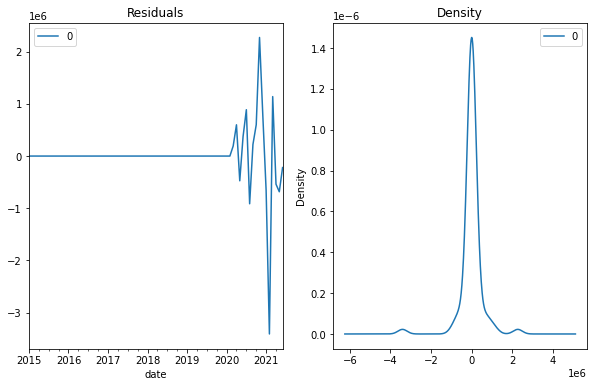

In [19]:
residuals = pd.DataFrame(fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

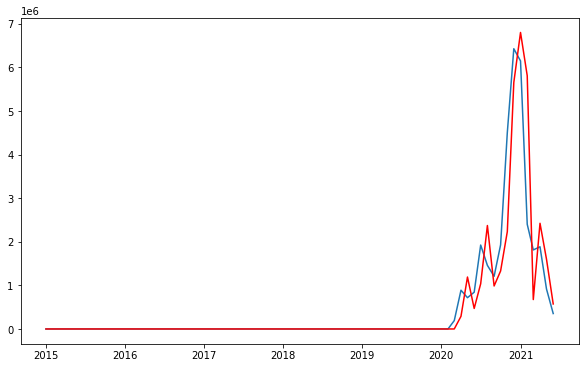

In [20]:
plt.plot(cases_per_date)
plt.plot(fit.fittedvalues, color='red')

In [21]:

# Mean Absolute Percentage Error (MAPE)
# Mean Error (ME)
# Mean Absolute Error (MAE)
# Mean Percentage Error (MPE)
# Root Mean Squared Error (RMSE)
# Lag 1 Autocorrelation of Error (ACF1)
# Correlation between the Actual and the Forecast (corr)
# Min-Max Error (minmax)



def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#     acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
#             'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [22]:
forecast_accuracy(fit.fittedvalues, cases_per_date.no_cases)

{'mape': inf,
 'me': -2138.44962692023,
 'mae': 178886.8184273603,
 'mpe': inf,
 'rmse': 539420.6200976545,
 'corr': 0.9043559884216318,
 'minmax': 0.5217775920014684}

# Modeling with the Brazil country

In [23]:
brazil_data_dengue = df[df.country.str.lower().str.contains('brazil') &
                        df.disease.isin(['dengue'])]
brazil_data_dengue.date = pd.to_datetime(brazil_data_dengue.date)

In [24]:
brazil_data_dengue[brazil_data_dengue.date.dt.year.isin([2018]) &
                   brazil_data_dengue.date.dt.month.isin([7,8])]

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
151333,Brazil,2018-07-08,2018,7,mosquito,10225.0,3.0,181807.0,80.0,dengue,27
151334,Brazil,2018-07-22,2018,7,mosquito,57582.0,7.0,239389.0,87.0,dengue,29
151335,Brazil,2018-08-05,2018,8,mosquito,45491.0,5.0,193898.0,92.0,dengue,31
151336,Brazil,2018-08-19,2018,8,mosquito,4886.0,8.0,198784.0,100.0,dengue,33


In [25]:
fit_data = brazil_data_dengue[['date','no_cases']]
train_data = fit_data[(fit_data.date >= pd.to_datetime('2015-01-01')) & 
                      (fit_data.date <= pd.to_datetime('2018-12-31'))].set_index('date')

predict_data = fit_data[fit_data.date.dt.year.isin([2019,2020])].set_index('date')

In [26]:
train_data.head()

,no_cases
date,
2015-01-04,11401.0
2015-01-11,15181.0
2015-01-18,23275.0
2015-01-25,29184.0
2015-02-01,37411.0


## Using the auto arima

In [27]:
from pmdarima.arima import auto_arima

In [28]:
auto_arima_model = auto_arima(train_data[['no_cases']].fillna(method="bfill"), random_state=42)
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  191
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1961.719
Date:                Sun, 01 Aug 2021   AIC                           3927.437
Time:                        11:08:20   BIC                           3933.931
Sample:                             0   HQIC                          3930.068
                                - 191                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2473      0.030      8.215      0.000       0.188       0.306
sigma2      5.477e+07   2.99e-11   1.83e+18      0.000    5.48e+07    5.48e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2345.36
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             1.86
Prob(H) (two-sided):                  0.99   Kurtosis:                        19.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [29]:
auto_arimaprediction = pd.DataFrame(auto_arima_model.predict(len(predict_data)),index=predict_data.index)
auto_arimaprediction.columns = ['Predicted']

In [30]:
auto_arimaprediction.head()

,Predicted
date,
2019-01-06,15610.77628
2019-01-13,15610.77628
2019-01-20,15610.77628
2019-01-27,15610.77628
2019-02-03,15610.77628


<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='date'>

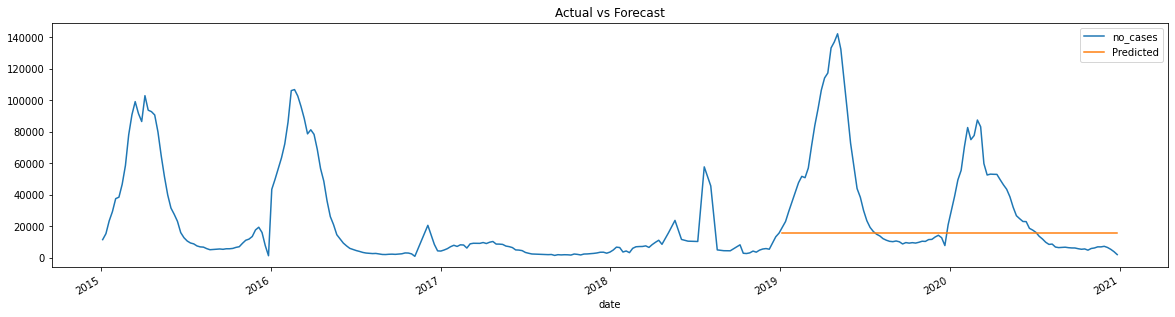

In [31]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Auto Arima Actual Vs Forecasted')
auto_arimaprediction.plot(y='Predicted',figsize=(20,5),title='Actual vs Forecast', ax=ax)

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='date'>

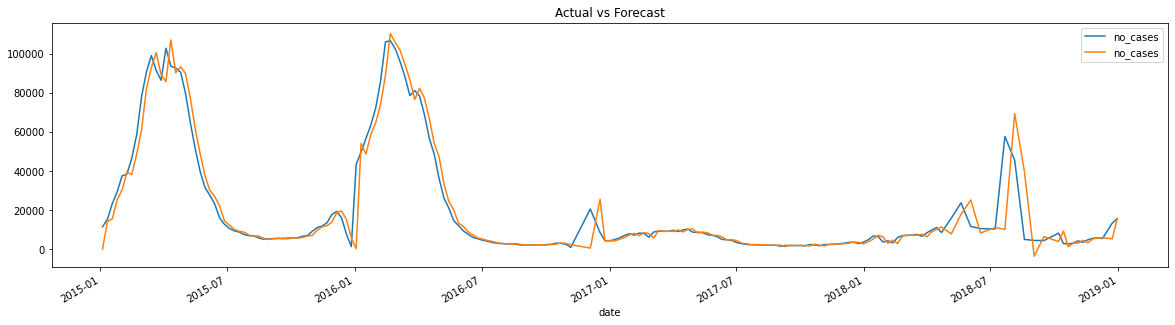

In [32]:
# Checking model fit on train data

trainfitpredict = pd.DataFrame(auto_arima_model.predict_in_sample(), index=train_data.index)
trainfitpredict.columns = ['no_cases']

ax = train_data.plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
trainfitpredict.plot(y='no_cases',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [33]:
trainfitpredict.head()

,no_cases
date,
2015-01-04,0.000000
2015-01-11,14012.622371
2015-01-18,15468.595727
2015-01-25,25204.656314
2015-02-01,30167.902255


# Classic Arima

In [34]:
def aic_for_orders(train, pdq_values):
    train = train.astype('float32')
    ordersaic_d = {}
    for current_pdq in pdq_values:
        cur_model = ARIMA(train, order=current_pdq)
        cur_results = cur_model.fit()
        cur_aic = cur_results.aic
        ordersaic_d[current_pdq] = cur_aic
    return ordersaic_d

def get_arima_predictions(train, test, order):
    predictions = list()
    for step in range(len(test)):
        model = ARIMA(train,order=order)
        fit_model = model.fit()
        prediction = fit_model.forecast().values[0]
        timestamp = test.index[step]
        predictions.append((timestamp, prediction))
        train = train.append(test.iloc[step])
    preds_frame = pd.DataFrame(predictions).set_index([0]).rename(columns={1:'Predictions'})
    return preds_frame

In [35]:
import itertools

In [36]:
p = d = q = range(0,4)
pdqlist = list(itertools.product(p, d, q))
newordersaic_d = aic_for_orders(train=train_data[['no_cases']].fillna(method="bfill"), pdq_values=pdqlist)

In [37]:
p

range(0, 4)

[Text(0.5, 0, 'orders'),
 Text(0, 0.5, '%'),
 Text(0.5, 1.0, 'pdq values and aic scores')]

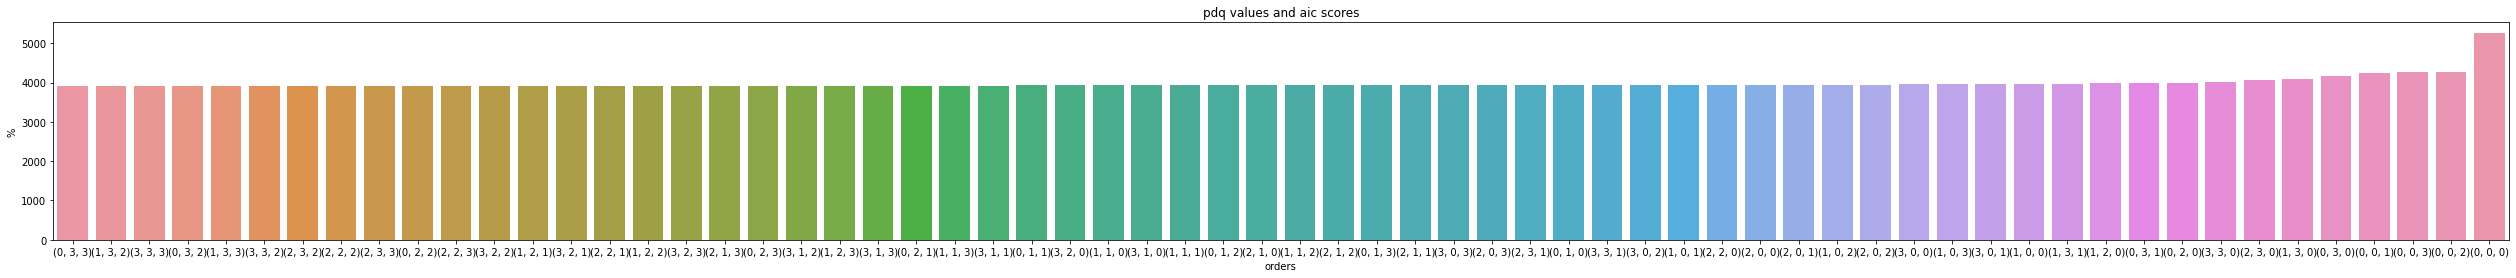

In [38]:
orders_andaic = pd.DataFrame(newordersaic_d.items(),columns=['orders','aic']).sort_values(by='aic',ascending=True)

fig_dims = (44, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='orders', y='aic', data=orders_andaic)
ax.set(xlabel = 'orders', ylabel='%', title='pdq values and aic scores')

In [39]:
pd.Series(['a']).values[0]

'a'

In [40]:
orders_andaic.head()

,orders,aic
15,"(0, 3, 3)",3907.221415
30,"(1, 3, 2)",3908.620708
63,"(3, 3, 3)",3909.657124
14,"(0, 3, 2)",3909.809816
31,"(1, 3, 3)",3910.801647


In [41]:
arima_test_predictions = get_arima_predictions(train_data[['no_cases']],
                                               predict_data[['no_cases']],
                                              order=(0,3,3))

In [42]:
arima_test_predictions.dtypes

Predictions    float64
dtype: object

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='0'>

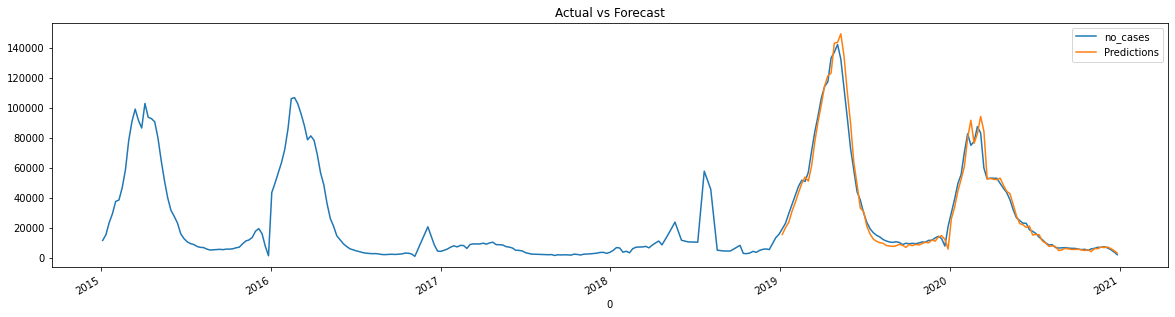

In [43]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [44]:
forecast_accuracy(arima_test_predictions['Predictions'], predict_data['no_cases'])

{'mape': 0.13003034215635817,
 'me': -136.59765075299558,
 'mae': 3613.4615394018247,
 'mpe': -0.042995670731785035,
 'rmse': 5879.296891927018,
 'corr': 0.9885806354278498,
 'minmax': 0.12131427637687264}

## COVID ARIMA for Brazil

In [45]:
brazil_data_covid = df[df.country.str.lower().str.contains('brazil') &
                       df.disease.isin(['covid-19'])]

brazil_data_covid.date = pd.to_datetime(brazil_data_covid.date)

In [46]:
fit_data = brazil_data_covid[['date','no_cases']]
train_data = fit_data[(fit_data.date.dt.year.isin([2020])) &
                      (fit_data.date.dt.month>5)].set_index('date')

predict_data = fit_data[fit_data.date.dt.year.isin([2021])].set_index('date')

In [47]:
train_data.head()

,no_cases
date,
2020-06-01,11598.0
2020-06-02,28936.0
2020-06-03,28633.0
2020-06-04,30925.0
2020-06-05,30830.0


In [48]:
auto_arima_model = auto_arima(train_data[['no_cases']].fillna(method="bfill"), random_state=42)
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2339.750
Date:                Sun, 01 Aug 2021   AIC                           4685.501
Time:                        11:09:04   BIC                           4695.598
Sample:                             0   HQIC                          4689.581
                                - 214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.895e+04   1828.175     10.364      0.000    1.54e+04    2.25e+04
ar.L1          0.4350      0.053      8.175      0.000       0.331       0.539
sigma2      1.826e+08      0.109   1.68e+09      0.000    1.83e+08    1.83e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.72   Prob(JB):                         0.05
Heteroskedasticity (H):               1.41   Skew:                             0.32
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.63e+23. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='date'>

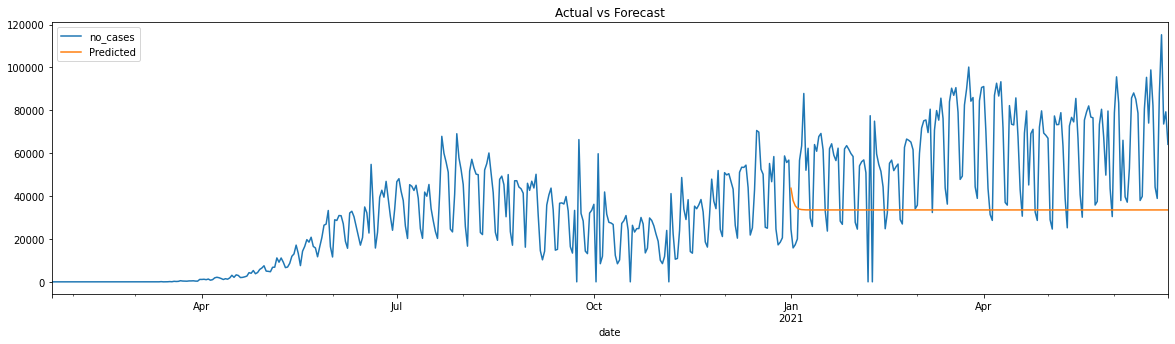

In [49]:
auto_arimaprediction = pd.DataFrame(auto_arima_model.predict(len(predict_data)),index=predict_data.index)
auto_arimaprediction.columns = ['Predicted']

ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Auto Arima Actual Vs Forecasted')
auto_arimaprediction.plot(y='Predicted',figsize=(20,5),title='Actual vs Forecast', ax=ax)

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='date'>

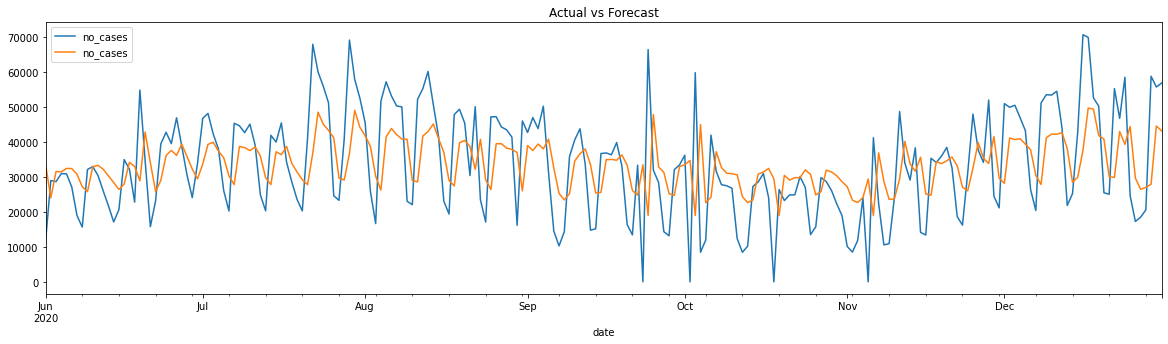

In [50]:
# Checking model fit on train data

trainfitpredict = pd.DataFrame(auto_arima_model.predict_in_sample(), index=train_data.index)
trainfitpredict.columns = ['no_cases']

ax = train_data.plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
trainfitpredict.plot(y='no_cases',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [60]:
p = d = q = range(0,3)
pdqlist = list(itertools.product(p, d, q))
newordersaic_d = aic_for_orders(train=train_data.no_cases, pdq_values=pdqlist)

[Text(0.5, 0, 'orders'),
 Text(0, 0.5, '%'),
 Text(0.5, 1.0, 'pdq values and aic scores')]

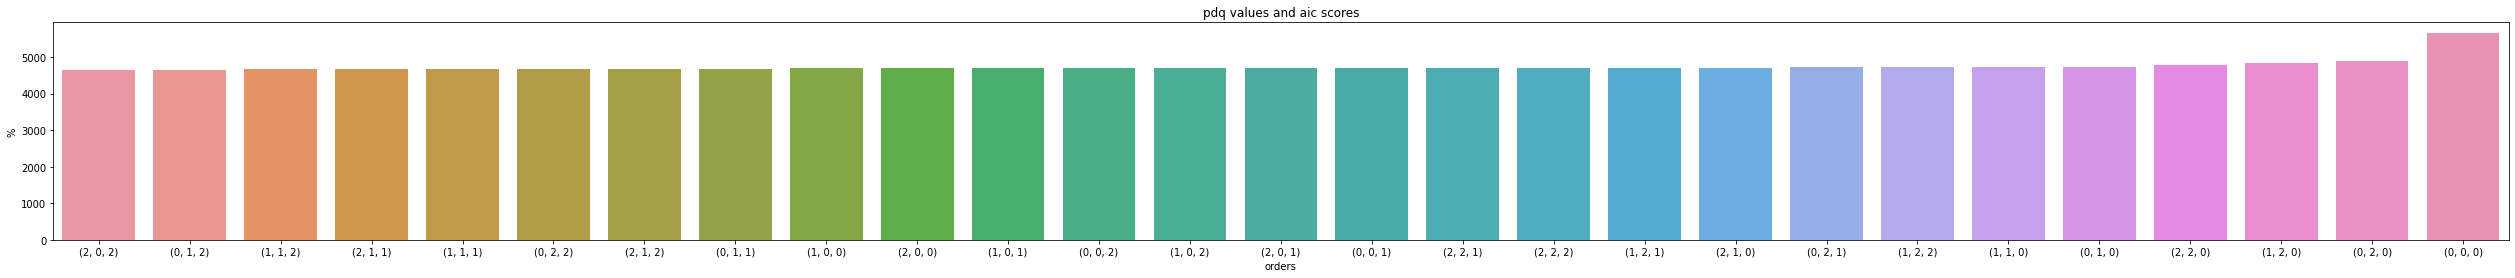

In [61]:
orders_andaic = pd.DataFrame(newordersaic_d.items(),columns=['orders','aic']).sort_values(by='aic',ascending=True)

fig_dims = (44, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='orders', y='aic', data=orders_andaic)
ax.set(xlabel = 'orders', ylabel='%', title='pdq values and aic scores')

In [62]:
arima_test_predictions = get_arima_predictions(train_data[['no_cases']],
                                               predict_data[['no_cases']],
                                              order=(0,2,3))

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='0'>

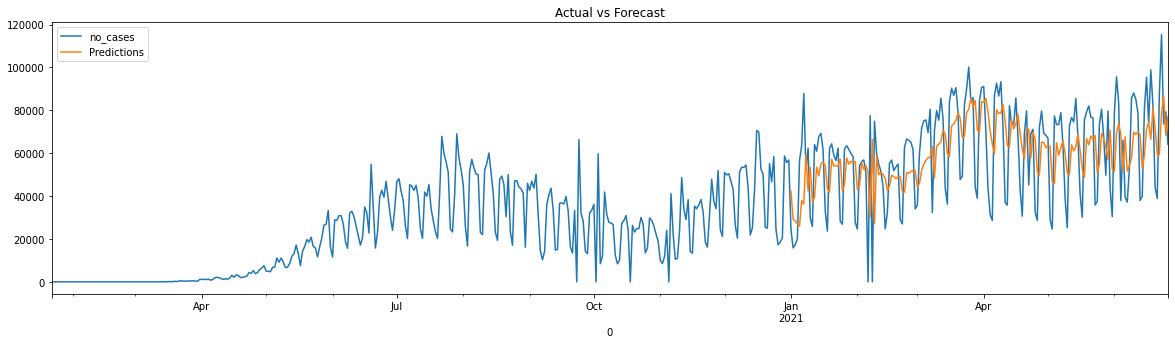

In [63]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [64]:
forecast_accuracy(arima_test_predictions['Predictions'], predict_data['no_cases'])

{'mape': inf,
 'me': -766.6922571887517,
 'mae': 17169.83210103332,
 'mpe': inf,
 'rmse': 20595.363659316732,
 'corr': 0.4124017349364369,
 'minmax': 0.2573668599190012}

## ZIKA ARIMA for Brazil

In [65]:
brazil_data_zika = df[df.country.str.lower().str.contains('brazil') &
                       df.disease.isin(['zika'])]

brazil_data_zika.date = pd.to_datetime(brazil_data_zika.date)

In [66]:
fit_data = brazil_data_zika[['date','no_cases']]
train_data = fit_data[(fit_data.date >= pd.to_datetime('2016-11-01')) &
                      (fit_data.date <= pd.to_datetime('2017-08-31'))].set_index('date')

predict_data = fit_data[(fit_data.date >= pd.to_datetime('2017-09-01')) &
                        (fit_data.date <= pd.to_datetime('2017-12-31'))].set_index('date')

In [67]:
auto_arima_model = auto_arima(train_data[['no_cases']].fillna(method="bfill"), random_state=42)
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:                        SARIMAX   Log Likelihood                -411.648
Date:                Sun, 01 Aug 2021   AIC                            827.296
Time:                        11:16:09   BIC                            830.865
Sample:                             0   HQIC                           828.620
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    629.3636   2398.185      0.262      0.793   -4070.993    5329.720
sigma2      7.829e+06   2.17e+06      3.609      0.000    3.58e+06    1.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              2685.07
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             6.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='date'>

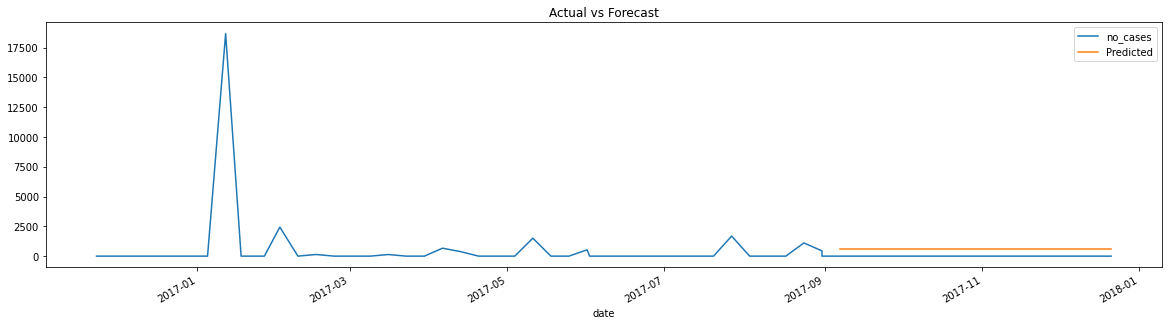

In [68]:
auto_arimaprediction = pd.DataFrame(auto_arima_model.predict(len(predict_data)),index=predict_data.index)
auto_arimaprediction.columns = ['Predicted']

ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Auto Arima Actual Vs Forecasted')
auto_arimaprediction.plot(y='Predicted',figsize=(20,5),title='Actual vs Forecast', ax=ax)

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='date'>

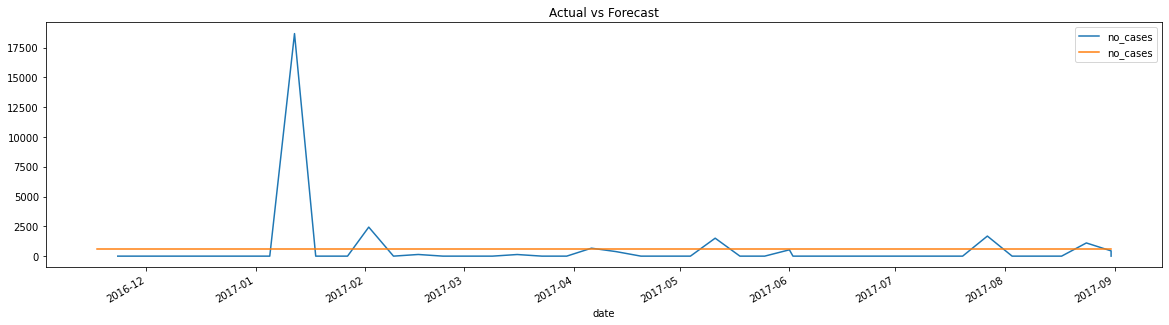

In [69]:
# Checking model fit on train data

trainfitpredict = pd.DataFrame(auto_arima_model.predict_in_sample(), index=train_data.index)
trainfitpredict.columns = ['no_cases']

ax = train_data.plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
trainfitpredict.plot(y='no_cases',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [71]:
p = d = q = range(0,3)
pdqlist = list(itertools.product(p, d, q))
newordersaic_d = aic_for_orders(train=train_data.no_cases, pdq_values=pdqlist)

[Text(0.5, 0, 'orders'),
 Text(0, 0.5, '%'),
 Text(0.5, 1.0, 'pdq values and aic scores')]

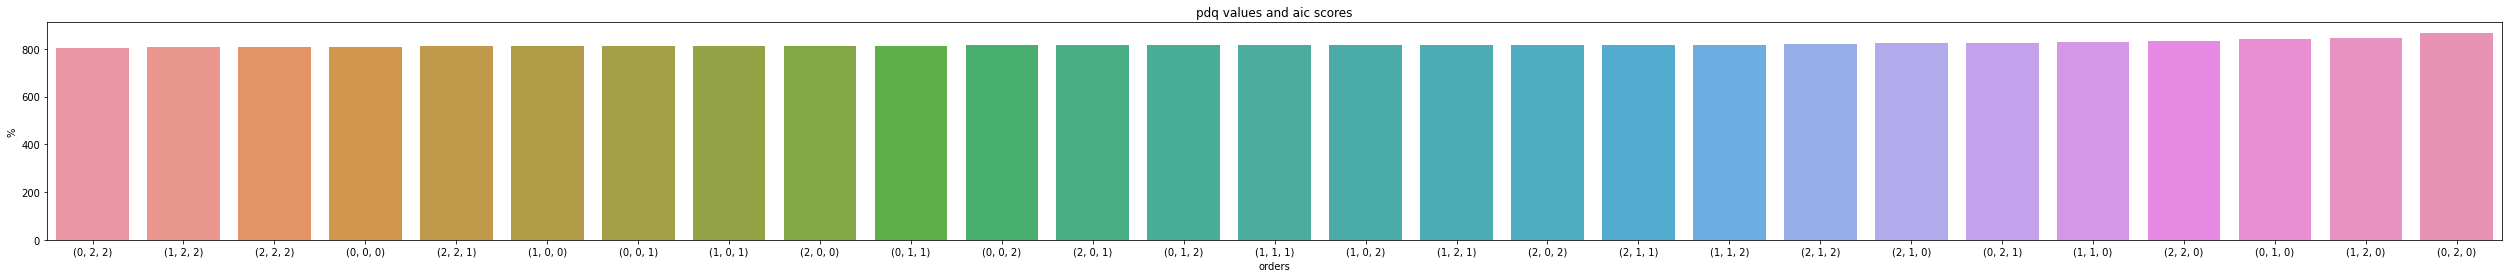

In [72]:
orders_andaic = pd.DataFrame(newordersaic_d.items(),columns=['orders','aic']).sort_values(by='aic',ascending=True)

fig_dims = (44, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='orders', y='aic', data=orders_andaic)
ax.set(xlabel = 'orders', ylabel='%', title='pdq values and aic scores')

In [73]:
arima_test_predictions = get_arima_predictions(train_data[['no_cases']],
                                               predict_data[['no_cases']],
                                              order=(1,0,2))

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='0'>

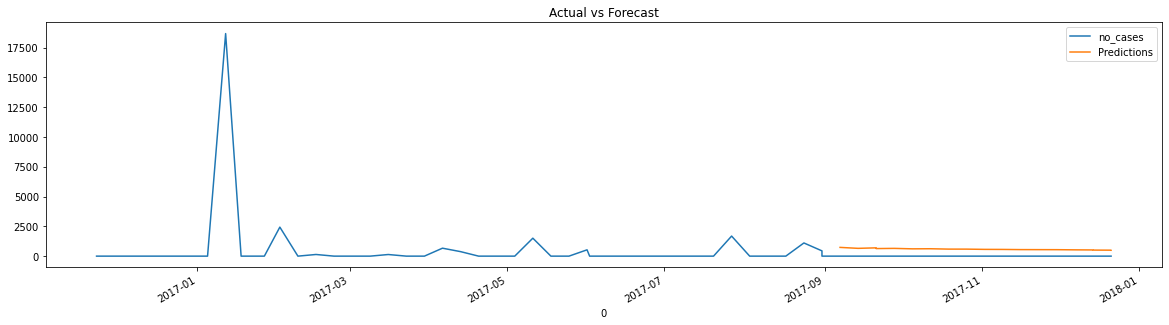

In [74]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [75]:
forecast_accuracy(arima_test_predictions['Predictions'], predict_data['no_cases'])

{'mape': inf,
 'me': 585.8399245360073,
 'mae': 585.8399245360073,
 'mpe': inf,
 'rmse': 589.6809205072508,
 'corr': nan,
 'minmax': 1.0}